In [2]:
import numpy as np

In [2]:
import math
import bisect


In [10]:
init_state = np.array([0.66, 5.09, 0.0], dtype=float)
goal = np.array([10.31, 3.68], dtype=float)
print(init_state[:2])
print(np.linalg.norm(init_state[:2] - goal))
print(np.sqrt((init_state[0]-goal[0])**2 + (init_state[1]-goal[1])**2))


[0.66 5.09]
9.75246635472279
9.75246635472279


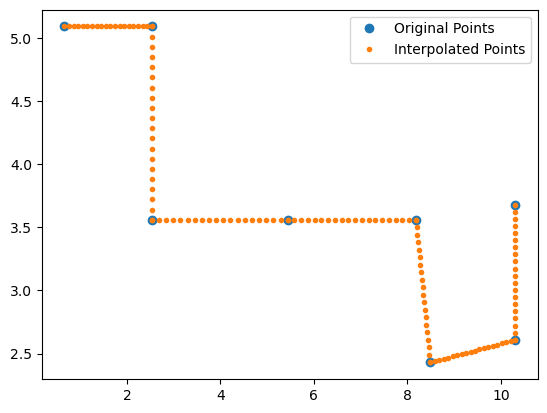

Point: [0.66 5.09], Yaw angle: 0.0
Point: [0.75842105 5.09      ], Yaw angle: 0.0
Point: [0.85684211 5.09      ], Yaw angle: 0.0
Point: [0.95526316 5.09      ], Yaw angle: 0.0
Point: [1.05368421 5.09      ], Yaw angle: 0.0
Point: [1.15210526 5.09      ], Yaw angle: 0.0
Point: [1.25052632 5.09      ], Yaw angle: 0.0
Point: [1.34894737 5.09      ], Yaw angle: 0.0
Point: [1.44736842 5.09      ], Yaw angle: 0.0
Point: [1.54578947 5.09      ], Yaw angle: 0.0
Point: [1.64421053 5.09      ], Yaw angle: 0.0
Point: [1.74263158 5.09      ], Yaw angle: 0.0
Point: [1.84105263 5.09      ], Yaw angle: 0.0
Point: [1.93947368 5.09      ], Yaw angle: 0.0
Point: [2.03789474 5.09      ], Yaw angle: 0.0
Point: [2.13631579 5.09      ], Yaw angle: 0.0
Point: [2.23473684 5.09      ], Yaw angle: 0.0
Point: [2.33315789 5.09      ], Yaw angle: 0.0
Point: [2.43157895 5.09      ], Yaw angle: 0.0
Point: [2.53 5.09], Yaw angle: -1.5707963267948966
Point: [2.53 5.09], Yaw angle: -1.5707963267948966
Point: [2.53     

IndexError: index 133 is out of bounds for axis 0 with size 133

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the points (x, y) coordinates
x = [0.66, 2.53, 2.53, 5.44, 8.18, 8.49, 10.31, 10.31]
y = [5.09, 5.09, 3.56, 3.56, 3.56, 2.43, 2.61, 3.68]
points = np.column_stack((x, y))

# points = np.array([[0, 0], [2, 2], [4, 0], [6, 2], [8, 0]])

# Number of interpolated points between each pair of original points
num_interp_points = 20

# Calculate the straight-line segments and interpolate
interp_points = []
interp_yaw_angles = []

for i in range(len(points) - 1):
    x_interp = np.linspace(points[i, 0], points[i + 1, 0], num_interp_points)
    y_interp = np.linspace(points[i, 1], points[i + 1, 1], num_interp_points)
    interp_points.append(np.column_stack((x_interp, y_interp)))

    # Calculate the yaw angles for each interpolated point
    dx = x_interp[1:] - x_interp[:-1]
    dy = y_interp[1:] - y_interp[:-1]
    yaw_angles = np.arctan2(dy, dx)
    interp_yaw_angles.append(yaw_angles)

# Concatenate the interpolated points and yaw angles
interp_points = np.concatenate(interp_points)
interp_yaw_angles = np.concatenate(interp_yaw_angles)

# Plot the original points and interpolated points
plt.plot(points[:, 0], points[:, 1], 'o', label='Original Points')
plt.plot(interp_points[:, 0], interp_points[:, 1], '.', label='Interpolated Points')
plt.legend()
plt.show()

# Print the interpolated points and their yaw angles
for i in range(len(interp_points) - 1):
    print(f"Point: {interp_points[i]}, Yaw angle: {interp_yaw_angles[i]}")


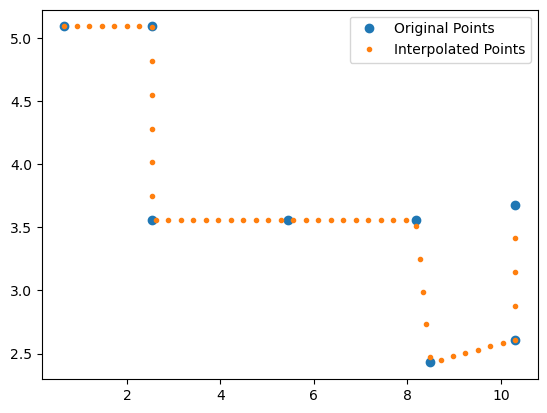

Point: [0.66 5.09], Yaw angle: 0.0
Point: [0.92776796 5.09      ], Yaw angle: 0.0
Point: [1.19553593 5.09      ], Yaw angle: 0.0
Point: [1.46330389 5.09      ], Yaw angle: 0.0
Point: [1.73107186 5.09      ], Yaw angle: 0.0
Point: [1.99883982 5.09      ], Yaw angle: 0.0
Point: [2.26660779 5.09      ], Yaw angle: -0.016611537686801108
Point: [2.53       5.08562425], Yaw angle: -1.5707963267948966
Point: [2.53       4.81785628], Yaw angle: -1.5707963267948966
Point: [2.53       4.55008832], Yaw angle: -1.5707963267948966
Point: [2.53       4.28232035], Yaw angle: -1.5707963267948966
Point: [2.53       4.01455239], Yaw angle: -1.5707963267948966
Point: [2.53       3.74678442], Yaw angle: -1.161691892441088
Point: [2.61098354 3.56      ], Yaw angle: 0.0
Point: [2.8787515 3.56     ], Yaw angle: 0.0
Point: [3.14651947 3.56      ], Yaw angle: 0.0
Point: [3.41428743 3.56      ], Yaw angle: 0.0
Point: [3.6820554 3.56     ], Yaw angle: 0.0
Point: [3.94982336 3.56      ], Yaw angle: 0.0
Point: [4.

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Define the points (x, y) coordinates
x = [0.66, 2.53, 2.53, 5.44, 8.18, 8.49, 10.31, 10.31]
y = [5.09, 5.09, 3.56, 3.56, 3.56, 2.43, 2.61, 3.68]
points = np.column_stack((x, y))

# Calculate the total distance along the path
total_distance = np.sum(np.sqrt(np.sum(np.diff(points, axis=0)**2, axis=1)))

# Number of interpolated points
num_interp_points = 50

# Calculate the constant distance between interpolated points
interp_distance = total_distance / (num_interp_points - 1)

# Interpolate points with constant distance and calculate yaw angles
interp_points = [points[0]]
interp_yaw_angles = []

current_distance = 0
current_point_index = 0

for _ in range(num_interp_points - 2):
    current_distance += interp_distance
    while current_point_index < len(points) - 1:
        segment_distance = np.sqrt(np.sum((points[current_point_index + 1] - points[current_point_index])**2))
        if current_distance < segment_distance:
            break
        else:
            current_distance -= segment_distance
            current_point_index += 1

    t = current_distance / segment_distance
    new_point = points[current_point_index] + t * (points[current_point_index + 1] - points[current_point_index])
    distance = np.linalg.norm(new_point - interp_points[-1])
    interp_points.append(new_point)

    # Calculate the yaw angle for each interpolated point
    dx = new_point[0] - interp_points[-2][0]
    dy = new_point[1] - interp_points[-2][1]
    yaw_angle = np.arctan2(dy, dx)
    interp_yaw_angles.append(yaw_angle)

interp_points = np.array(interp_points)

# Plot the original points and interpolated points
plt.plot(points[:, 0], points[:, 1], 'o', label='Original Points')
plt.plot(interp_points[:, 0], interp_points[:, 1], '.', label='Interpolated Points')
plt.legend()
plt.show()

# Print the interpolated points and their yaw angles
for i in range(len(interp_points) - 1):
    print(f"Point: {interp_points[i]}, Yaw angle: {interp_yaw_angles[i]}")


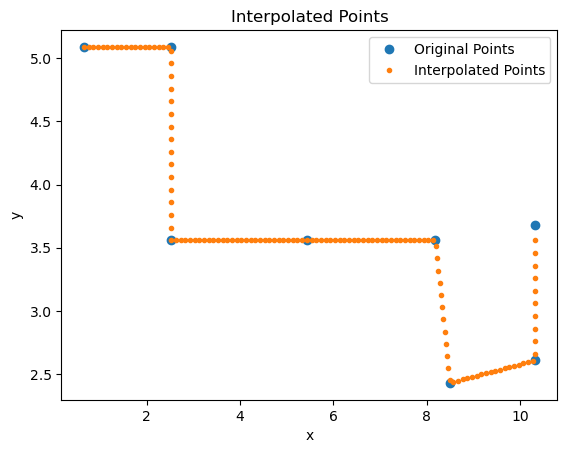

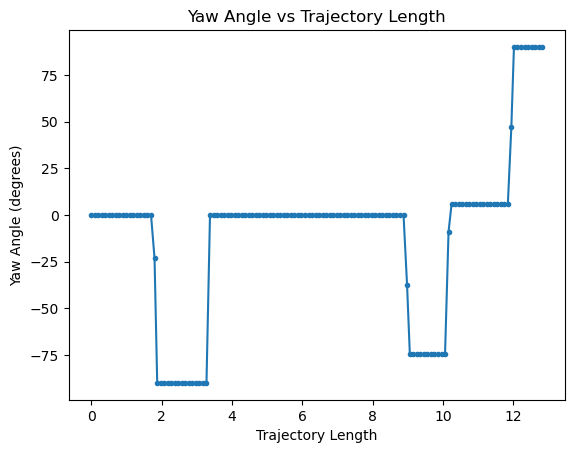

In [85]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0.66, 2.53, 2.53, 5.44, 8.18, 8.49, 10.31, 10.31])
y = np.array([5.09, 5.09, 3.56, 3.56, 3.56, 2.43, 2.61, 3.68])
points = np.column_stack((x, y))

total_distance = np.sum(np.sqrt(np.sum(np.diff(points, axis=0)**2, axis=1)))

# num_interp_points = 100
# interp_distance = total_distance / (num_interp_points - 1)
interp_distance = 0.1

num_interp_points = (total_distance // interp_distance).astype(int) + 1

interp_points = [points[0]]
interp_yaw_angles = []
interp_trajectory_lengths = [0]

current_distance = 0
current_point_index = 0

for _ in range(num_interp_points - 2):
    current_distance += interp_distance
    while current_point_index < len(points) - 1:
        segment_distance = np.sqrt(np.sum((points[current_point_index + 1] - points[current_point_index])**2))
        if current_distance < segment_distance:
            break
        else:
            current_distance -= segment_distance
            current_point_index += 1

    t = current_distance / segment_distance
    new_point = points[current_point_index] + t * (points[current_point_index + 1] - points[current_point_index])
    distance = np.linalg.norm(new_point - interp_points[-1])
    interp_points.append(new_point)

    dx = new_point[0] - interp_points[-2][0]
    dy = new_point[1] - interp_points[-2][1]
    yaw_angle = np.arctan2(dy, dx)
    interp_yaw_angles.append(yaw_angle)
    interp_trajectory_lengths.append(interp_trajectory_lengths[-1] + distance)

interp_points = np.array(interp_points)

plt.figure(1)
plt.plot(points[:, 0], points[:, 1], 'o', label='Original Points')
plt.plot(interp_points[:, 0], interp_points[:, 1], '.', label='Interpolated Points')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolated Points")

plt.figure(2)
plt.plot(interp_trajectory_lengths[:-1], np.degrees(interp_yaw_angles), '.-')
plt.xlabel("Trajectory Length")
plt.ylabel("Yaw Angle (degrees)")
plt.title("Yaw Angle vs Trajectory Length")

plt.show()

# for i in range(len(interp_points) - 1):
#     print(f"Point: {interp_points[i]}, Yaw angle: {interp_yaw_angles[i]}")


132
13.120630265099257
0.09939871412953982


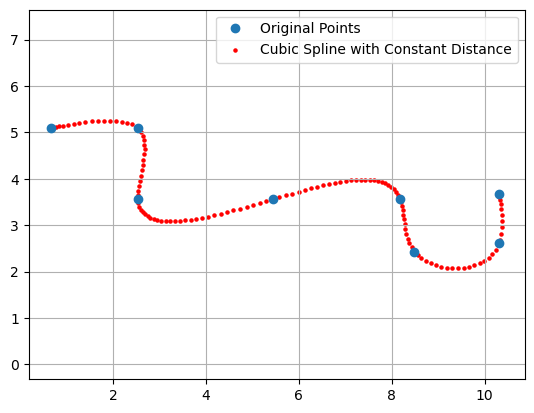

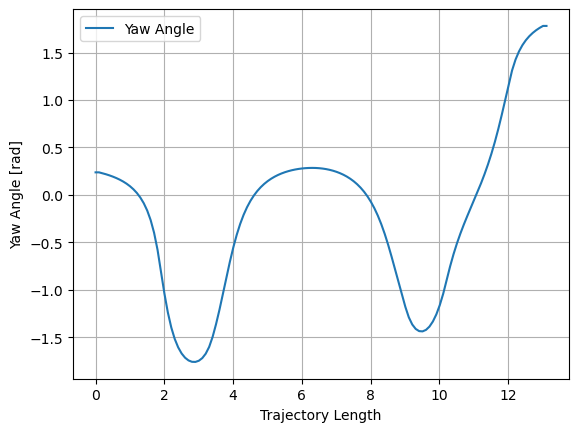

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

x = np.array([0.66, 2.53, 2.53, 5.44, 8.18, 8.49, 10.31, 10.31])
y = np.array([5.09, 5.09, 3.56, 3.56, 3.56, 2.43, 2.61, 3.68])

# Calculate the arc length
ds = np.sqrt(np.diff(x)**2 + np.diff(y)**2)
s = np.hstack(([0], np.cumsum(ds)))

# Create the cubic spline using the arc length as the parameter
cs = CubicSpline(s, y, bc_type='clamped')
cs_x = CubicSpline(s, x, bc_type='clamped')

# Define the adjustable constant distance
constant_distance = 0.1  # You can change this value to adjust the distance between interpolated points

# Calculate the total trajectory length and number of points for interpolation
total_length = s[-1]
num_points = int(total_length / constant_distance) + 1

# Generate interpolation points
t = np.linspace(s[0], s[-1], num=num_points)
interpolated_y = cs(t)
interpolated_x = cs_x(t)

# Calculate the yaw angle using the derivatives of the cubic spline
dx = cs_x.derivative(1)(t)
dy = cs.derivative(1)(t)
yaw_angles = np.arctan2(dy, dx)
yaw_angles[0] = yaw_angles[1]
yaw_angles[-1] = yaw_angles[-2]

print(len(t))
print(t[-1])
print(t[-1]/len(t))

# Plot the original points and the cubic spline
plt.plot(x, y, 'o', label='Original Points')
plt.scatter(interpolated_x, interpolated_y, s=5, c='r', label='Cubic Spline with Constant Distance')
plt.legend(loc='best')
plt.grid(True)
plt.axis('equal')
plt.show()

# Plot the yaw angle with respect to trajectory length
plt.plot(t, yaw_angles, label='Yaw Angle')
plt.xlabel('Trajectory Length')
plt.ylabel('Yaw Angle [rad]')
plt.legend(loc='best')
plt.grid(True)
plt.show()